<a href="https://colab.research.google.com/github/mrinalsenapati04/Weather-Prediction-LSTM/blob/main/weatherPredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl https://www.bgc-jena.mpg.de/wetter/mpi_saale_2021b.zip -o mpi_saale_2021b.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1486k  100 1486k    0     0   325k      0  0:00:04  0:00:04 --:--:--  325k


In [3]:
import zipfile
import pandas

zip_file = zipfile.ZipFile("mpi_saale_2021b.zip")
zip_file.extractall()

In [9]:
csv_path = "mpi_saale_2021b.csv"
data_frame = pandas.read_csv(csv_path)

In [13]:
display(data_frame.head(1))

,Date Time,p (mbar),T (degC),rh (%),sh (g/kg),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),...,ST008 (degC),ST016 (degC),ST032 (degC),ST064 (degC),ST128 (degC),SM008 (%),SM016 (%),SM032 (%),SM064 (%),SM128 (%)
0,01.07.2021 00:10:00,994.66,15.3,88.0,9.64,288.89,13.33,17.41,15.32,2.09,...,19.71,20.04,19.46,17.47,14.14,24.74,21.69,23.17,26.47,32.96


In [19]:
time = data_frame["Date Time"]
temp = data_frame["T (degC)"]
pressure = data_frame["p (mbar)"]
rel_humid = data_frame["rh (%)"]
vapor_pressure = data_frame["VPact (mbar)"]
wind_speed = data_frame["wv (m/s)"]
airtight = data_frame["rho (g/m**3)"]

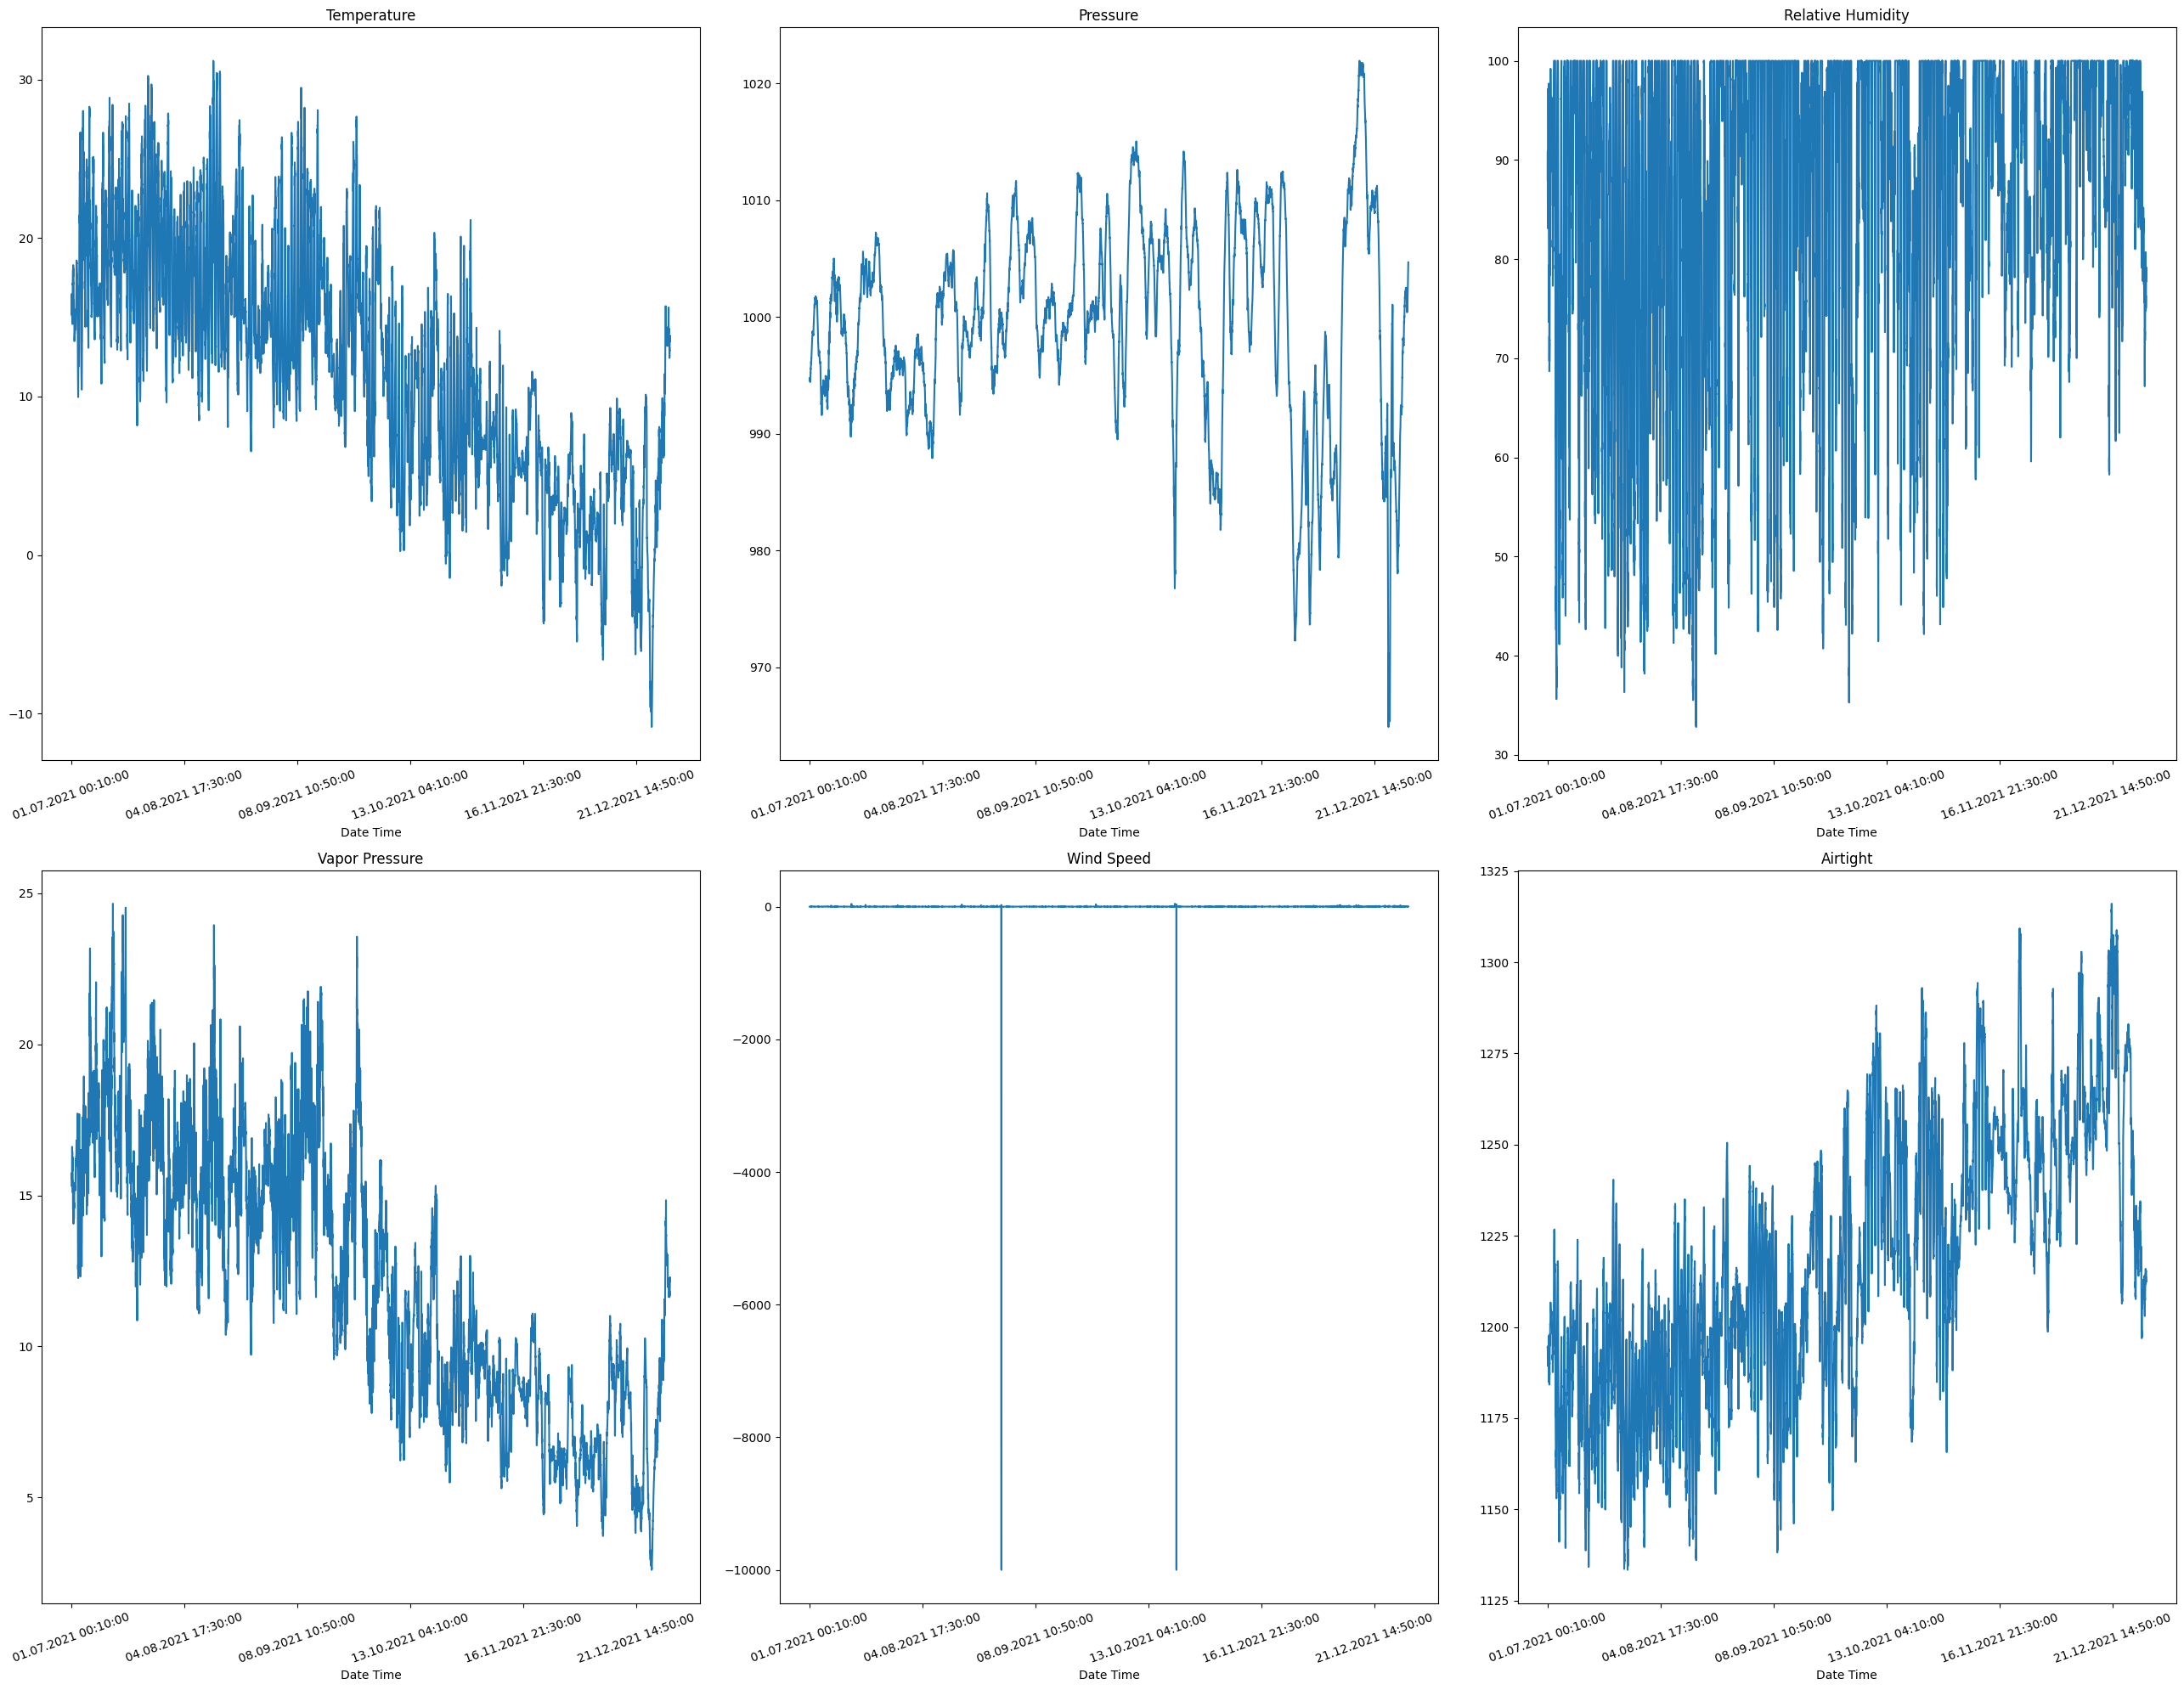

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.subplots(nrows=2, ncols=3, figsize=(26, 20))

ax = plt.subplot(2, 3, 1)
temp.index = time
temp.head()
temp.plot(rot=20)
plt.title('Temperature')

ax = plt.subplot(2, 3, 2)
pressure.index = time
pressure.head()
pressure.plot(rot=20)
plt.title('Pressure')

ax = plt.subplot(2, 3, 3)
rel_humid.index = time
rel_humid.head()
rel_humid.plot(rot=20)
plt.title('Relative Humidity')

ax = plt.subplot(2, 3, 4)
vapor_pressure.index = time
vapor_pressure.head()
vapor_pressure.plot(rot=20)
plt.title('Vapor Pressure')

ax = plt.subplot(2, 3, 5)
wind_speed.index = time
wind_speed.head()
wind_speed.plot(rot=20)
plt.title('Wind Speed')

ax = plt.subplot(2, 3, 6)
airtight.index = time
airtight.head()
airtight.plot(rot=20)
plt.title('Airtight')

plt.tight_layout()
plt.show()

In [26]:
def normalize(data):
  data_mean = data.mean(axis=0)
  data_std = data.std(axis=0)
  return (data - data_mean)/data_std

In [34]:
features = pandas.concat([temp,pressure, rel_humid, vapor_pressure, wind_speed, airtight], axis = 1)
features.index = time
print(features.values)

[[1.53000e+01 9.94660e+02 8.80000e+01 1.53200e+01 5.20000e-01 1.19425e+03]
 [1.51600e+01 9.94600e+02 8.99000e+01 1.55100e+01 5.60000e-01 1.19467e+03]
 [1.51800e+01 9.94560e+02 9.09000e+01 1.57100e+01 1.09000e+00 1.19445e+03]
 ...
 [1.35200e+01 1.00453e+03 7.86800e+01 1.22100e+01 3.59000e+00 1.21509e+03]
 [1.35500e+01 1.00462e+03 7.83200e+01 1.21800e+01 3.54000e+00 1.21509e+03]
 [1.35200e+01 1.00468e+03 7.83900e+01 1.21600e+01 2.97000e+00 1.21530e+03]]


In [35]:
features = normalize(features.values)
features = pandas.DataFrame(features)
print(features)

              0         1         2         3         4         5
0      0.503930 -0.586142  0.136120  0.737202  0.003771 -0.687664
1      0.485351 -0.593114  0.252726  0.780616  0.004097 -0.675877
2      0.488005 -0.597762  0.314097  0.826314  0.008410 -0.682051
3      0.560994 -0.598924  0.056337  0.782900  0.008410 -0.743794
4      0.620712 -0.595438 -0.090955  0.785185  0.009957 -0.794872
...         ...       ...       ...       ...       ...       ...
26491  0.269038  0.554893 -0.415611  0.040296  0.024199 -0.106443
26492  0.263729  0.561865 -0.410702  0.035726  0.025745 -0.099427
26493  0.267711  0.560703 -0.435864  0.026587  0.028756 -0.102795
26494  0.271692  0.571161 -0.457958  0.019732  0.028349 -0.102795
26495  0.267711  0.578132 -0.453662  0.015162  0.023711 -0.096901

[26496 rows x 6 columns]


In [37]:
training_size = int (0.8 * features.shape[0])
train_data = features.loc[0: training_size - 1]
val_data = features.loc[training_size:]

In [40]:
print(train_data.shape)
print(val_data.shape)

(21196, 6)
(5300, 6)
